In [1]:
import pandas as pd

In [2]:
cctv_seoul = pd.read_csv('../../data/python_data/01. CCTV_in_Seoul.csv')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
cctv_seoul.columns[0]

'기관명'

### 판다스 DataFrame의 칼럼 이름 변경하기
- df.rename(columns = {'old':'new'},inplact= True)
- df.columns = ['a','b']

In [4]:
#칼럼 이름 바꾸기
cctv_seoul.rename(columns = {cctv_seoul.columns[0]:'구별'},inplace = True)

In [5]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
cctv_seoul.columns = ['구별','소계','2013년도 이전','2014년','2015년','2016년']
cctv_seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932


## 2. 엑셀파일 읽기 - 서울시 인구현황

In [7]:
pop_seoul = pd.read_excel('../../data/python_data/01. population_in_Seoul.xls',header=2,usecols = 'B,D,G,J,N')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [8]:
pop_seoul.columns = ['구별','인구수','한국인','외국인','고령자']
#pop_seoul.rename(columns={pop_seoul[0]:'구별',pop_seoul.columns[1]:'인구수',....})
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## 3. CCTV 데이터 파악하기

In [9]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [10]:
cctv_seoul.sort_values(by='소계',ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [11]:
cctv_seoul.sort_values(by='소계',ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [12]:
cctv_seoul['최근증가율'] = (cctv_seoul['2016년']+cctv_seoul['2015년']+cctv_seoul['2014년'])/cctv_seoul['2013년도 이전']*100
cctv_seoul.sort_values(by='최근증가율',ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


## 4. 서울시 인구 데이터 파악하기

In [13]:
pop_seoul.drop([0],inplace=True) # 행 삭제
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [14]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [15]:
#isnull 명령어로 누락값 데이터 추출
pop_seoul[pop_seoul['구별'].isnull()]
#pop_seoul.tail(1)

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [16]:
pop_seoul.drop([26],inplace=True) # nan행 삭제
pop_seoul.tail(2)

,구별,인구수,한국인,외국인,고령자
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [17]:
pop_seoul['외국인비율'] = pop_seoul['외국인']/pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자']/pop_seoul['인구수'] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [18]:
#인구수는 송파구, 강서구, 강남구, 노원구,관악구 순으로 많다
pop_seoul.sort_values(by='인구수',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [19]:
#외국인수는 영등포구, 구로구, 금천구, 관악구, 동대문구 순으로 많다
pop_seoul.sort_values(by='외국인',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [20]:
# 인구수대비 외국인비율은 영등포구, 금천구, 구로구, 중구, 용산구 순으로 많다
pop_seoul.sort_values(by='외국인비율',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [21]:
pop_seoul.sort_values(by='고령자',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [22]:
pop_seoul.sort_values(by='고령자비율',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## 5. CCTV 데이터와 인구 데이터 합치고 분석

In [23]:
data_result = pd.merge(cctv_seoul,pop_seoul,on='구별')
data_result

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,573,78,53,174,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,1142,173,246,323,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,674,51,269,354,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,542,57,451,516,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,238,159,42,386,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [24]:
#drop - 행 방향 삭제, del - 열 방향 삭제
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [25]:
data_result.set_index('구별',inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [26]:
#CCTV 개수와 고령자 비율은 약한 음의 상관관계
import numpy as np
np.corrcoef(data_result['고령자비율'],data_result['소계'])
# 상관분석은 두 변수간에 어떤 선형적 관계를 갖고 있는지를 분석하는 방법
# 두 변수는 서로 독립적인 관계로부터 서로 상관된 관계일 수 있으며 두 변수간의 관계의 강도를 상관관계라고 함
# 상관계수의 절대값이 클수록 두 데이터는 관계가 있다고 봄
# 0.1 이하면 거의 무시, 0.3 이상이면 약한 상관관계, 0.7 이상이면 뚜렷한 상관관계라고 함

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [27]:
#CCTV 개수와 외국인 비율과는 큰 의미가 없음
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [28]:
#인구수와도 약한 상관관계
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [29]:
data_result.sort_values(by='소계',ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [30]:
data_result.sort_values(by='인구수',ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 6. CCTV와 인구현황 그래프로 분석하기

In [32]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False # - 기호 깨지는 것 방지
#f_path = '/Library/Fonts/AppleGothic.ttf'(맥)
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name() # - 글씨 깨지는 것 방지
rc('font', family=font_name)

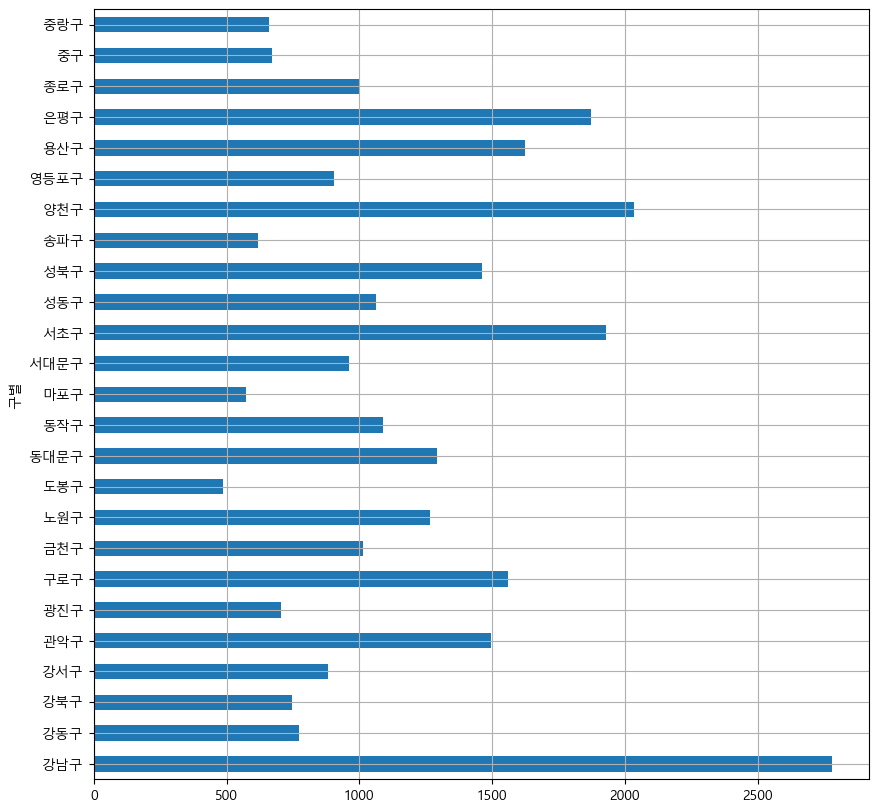

In [33]:
plt.figure()
data_result['소계'].plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

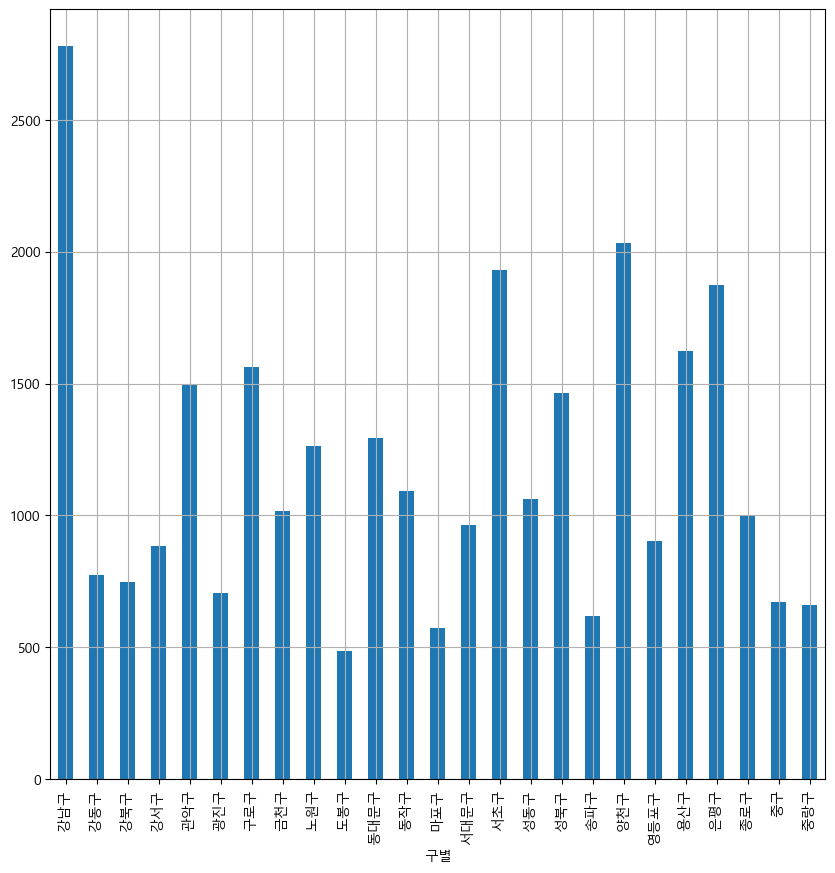

In [34]:
plt.figure()
data_result['소계'].plot(kind='bar',grid=True,figsize=(10,10))
plt.show()

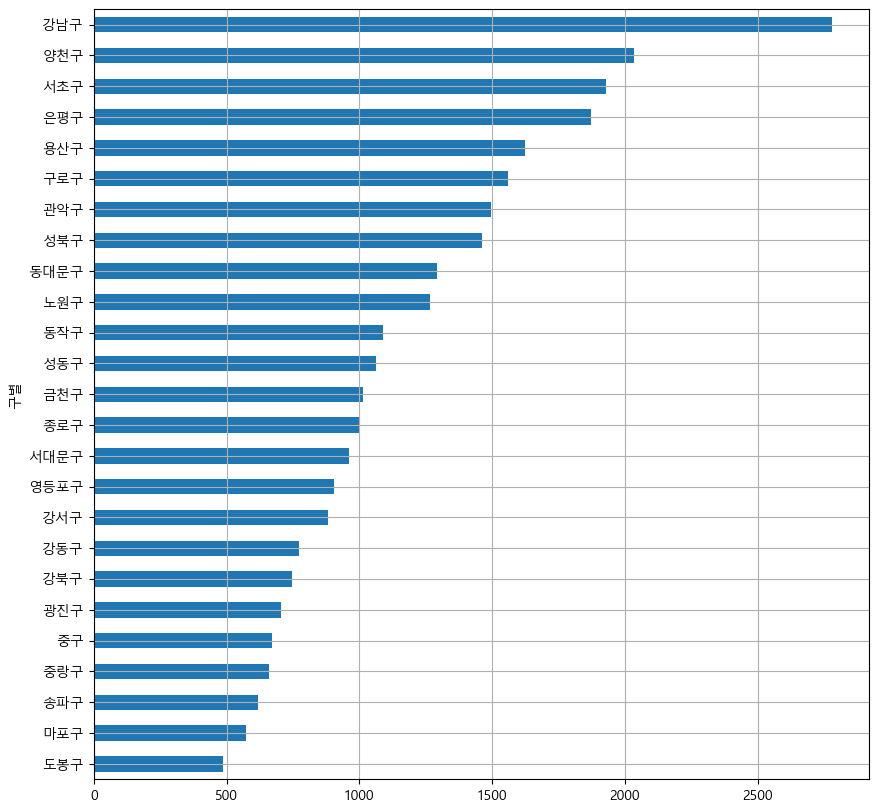

In [35]:
plt.figure()
data_result['소계'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

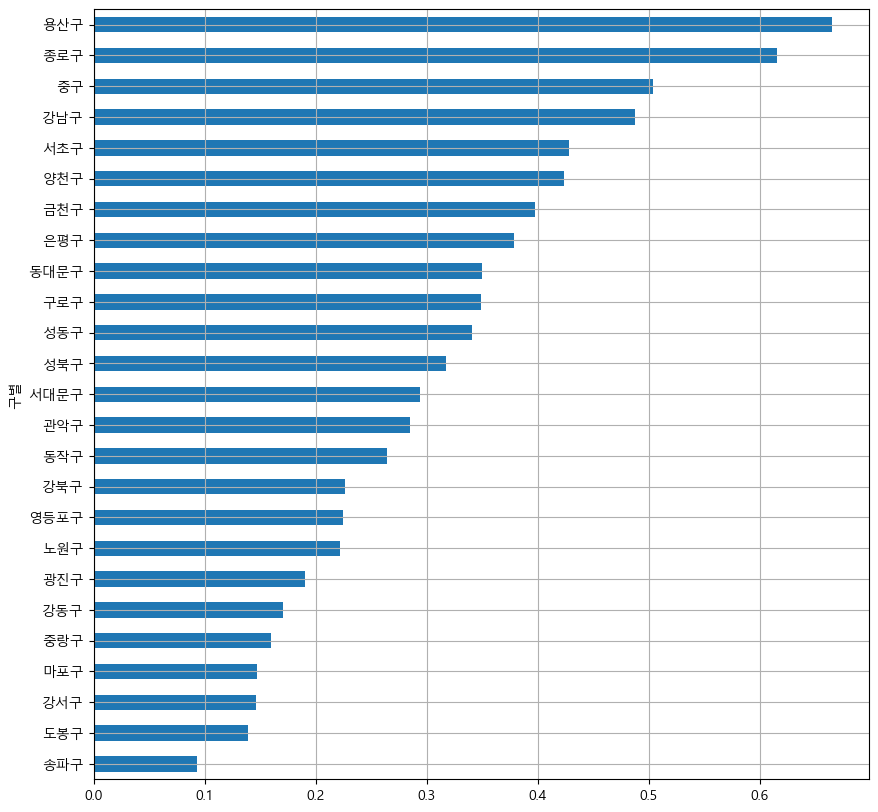

In [36]:
data_result['CCTV비율'] = data_result['소계']/data_result['인구수']*100

data_result['CCTV비율'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))

plt.show()

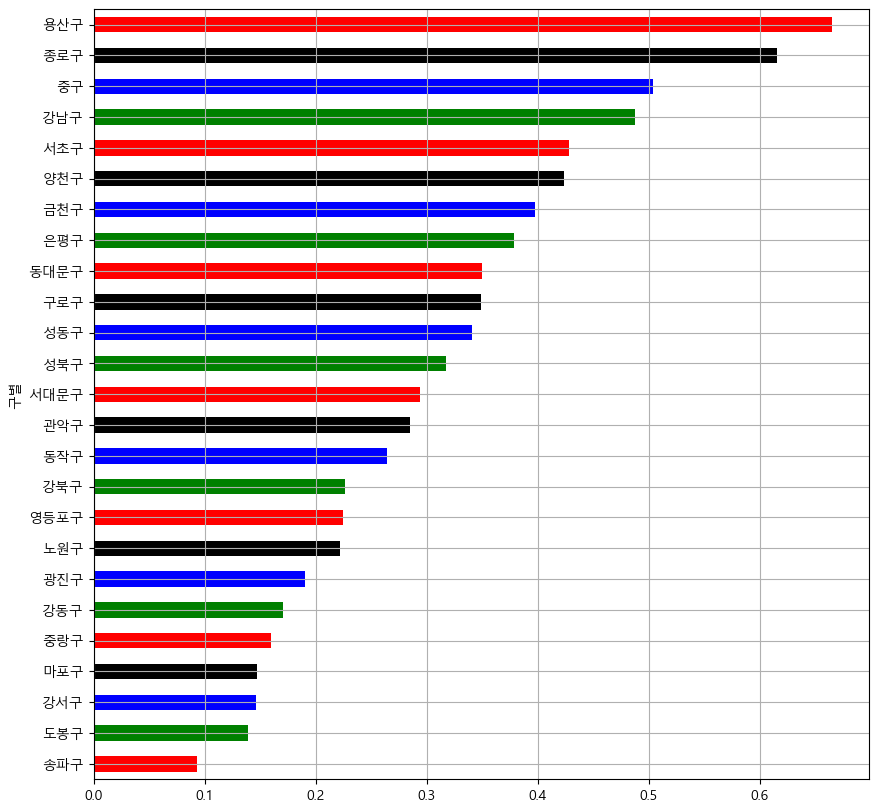

In [37]:
import seaborn as sns
colors = list('rgbk')
data_result['CCTV비율'].sort_values().plot(kind='barh',grid=True,figsize=(10,10),color=colors)

plt.show()

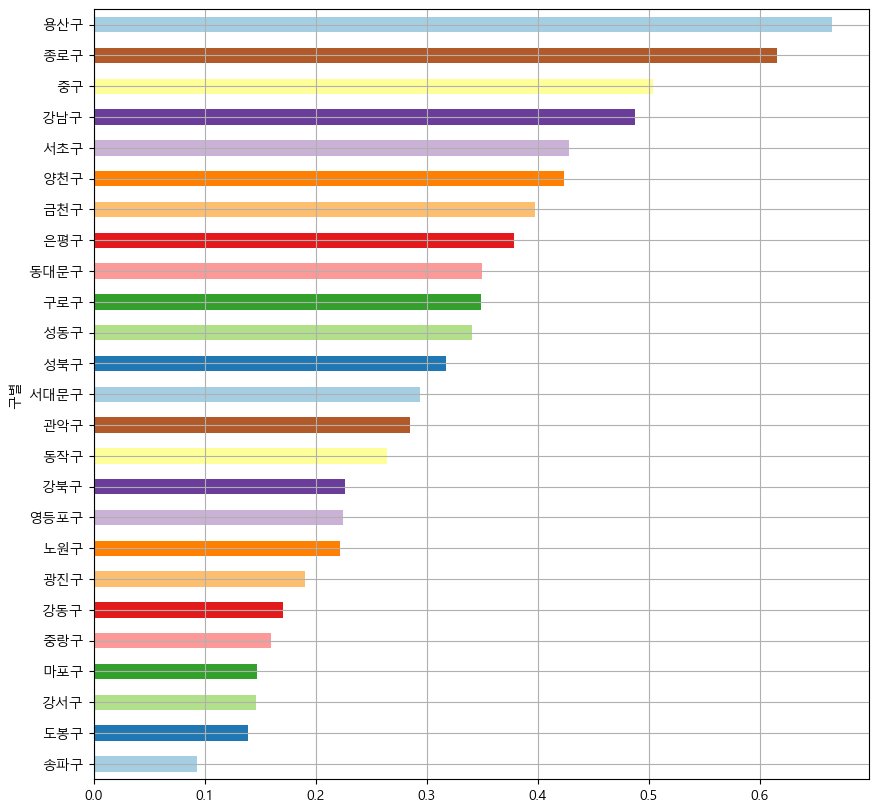

In [38]:
colors = sns.color_palette("Paired",len(data_result.index))
data_result['CCTV비율'].sort_values().plot(kind='barh',grid=True,figsize=(10,10),color=colors)

plt.show()

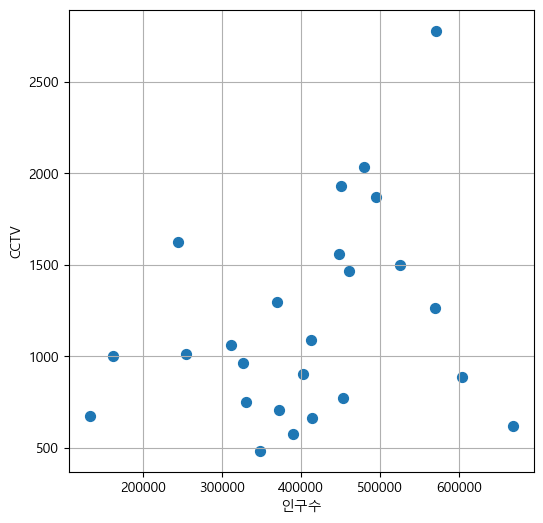

In [39]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'],s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [40]:
#기울기, 절편, 1차원
#y = ax+b (a - 기울기, b - 절편)
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [41]:
#polynomial
f1 = np.poly1d(fp1) # 매개변수로부터 모델 생성
fx = np.linspace(100000,700000,100) # 시작, 끝(포함),갯수

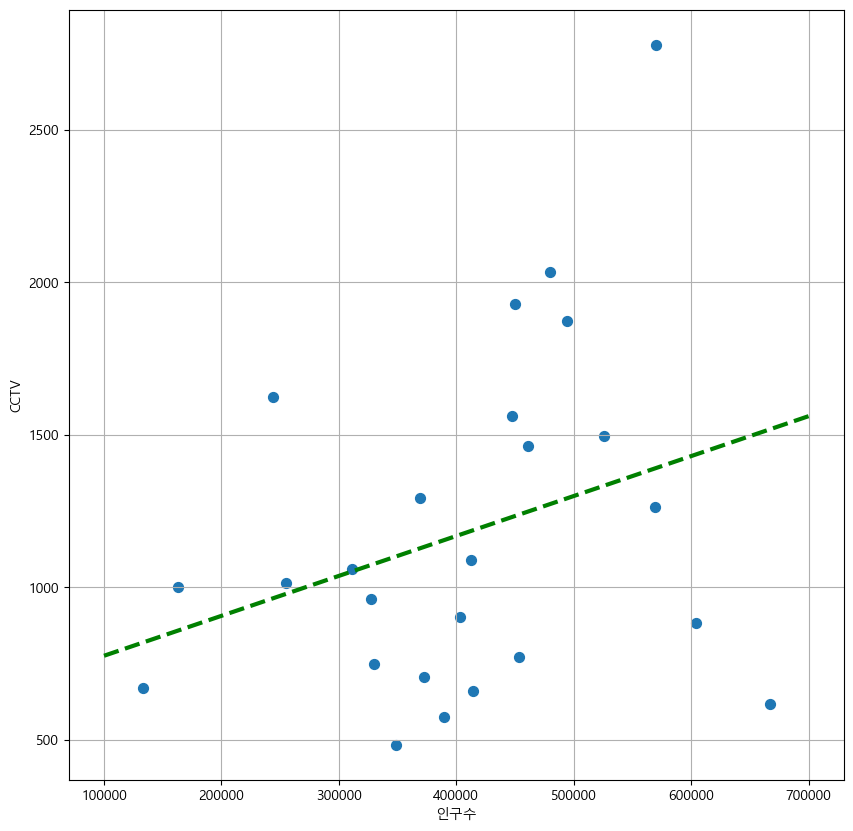

In [42]:
# 그래프에서 인구 300000일 때, cctv 1100대 정도가 적절하다
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'],data_result['소계'],s=50)
plt.plot(fx, f1(fx), ls = 'dashed',lw=3,color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [50]:
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)

data_result['오차']= np.abs(data_result['소계']-f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차',ascending=False)
df_sort.head(10)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690
도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.139110,616.501341
마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110,0.147312,581.180999
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,0.378852,580.698457
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155


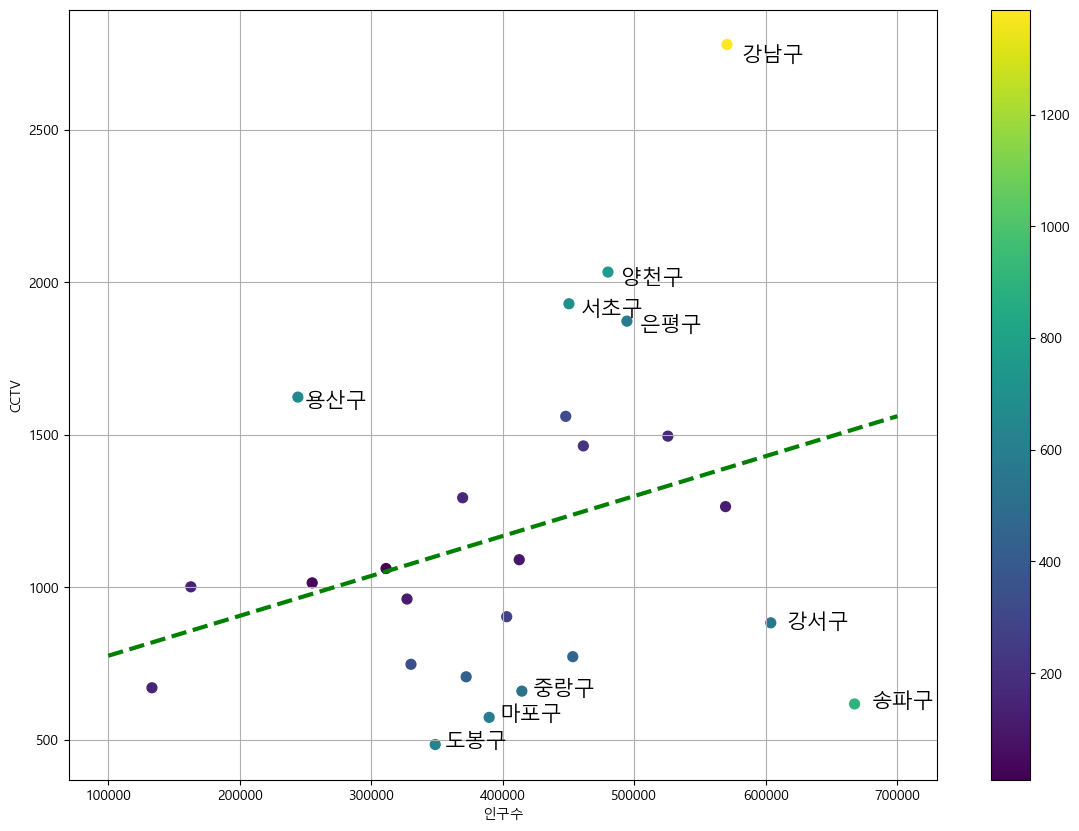

In [48]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'],data_result['소계'],c=data_result['오차'],s=50)
plt.plot(fx, f1(fx), ls = 'dashed',lw=3,color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,df_sort.index[n],fontsize=15)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.grid()
plt.show()

In [49]:
df_sort.index

Index(['강남구', '송파구', '양천구', '서초구', '용산구', '도봉구', '마포구', '은평구', '강서구', '중랑구',
       '강동구', '광진구', '구로구', '강북구', '영등포구', '성북구', '동대문구', '관악구', '중구', '종로구',
       '노원구', '서대문구', '동작구', '금천구', '성동구'],
      dtype='object', name='구별')